Advanced Convolutions

**A. Target**
1. change the code such that it uses GPU
2. change the architecture to C1C2C3C40 (basically 3 MPs)
3. total RF must be more than 44
4. one of the layers must use Depthwise Separable Convolution
5. one of the layers must use Dilated Convolution
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional)
7. achieve 80% accuracy, as many epochs as you want. Total Params to be less than 1M.

**B. Results**
1. Parameters: 815,200
2. Best Training Accuracy in 20 epochs: 87.72%
3. Best Test Accuracy in 20 epochs: 85.09 %
4. Total RF reached: 76*76 at the end of Conv block 4

**C. Analysis**

Model meets all the mentioned targets. I have used the Depthwise
seprable con and dialted kernel in the conv block 3. Also, As train test gap was coming more in earlier versions, I have used the horizontal flip and random rotations to act as regulaizer and reduce the train test gap. Code is modularized and uploaded as package in git repo. 


In [ ]:
import torch
import torch.optim as optim

from torchsummary import summary
from torch.optim.lr_scheduler import StepLR

In [ ]:
!git clone https://github.com/SachinDangayach/EVA5

fatal: destination path 'EVA5' already exists and is not an empty directory.


In [ ]:
from EVA5.dataset import session7_dataset as dataset
from EVA5.models import session7_model as models
from EVA5.models import session7_train_model as train
from EVA5.models import session7_test_model as test
from EVA5.utils import session7_utils as utils

## Extract, Load and Transform Data

In [ ]:
# Calculate Ture Mean and STD
norm_mean,norm_std = dataset.cifar10_mean_std() #  (0.49, 0.48, 0.45), (0.25, 0.24, 0.26)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Get train and test transform
train_transform, test_transform = dataset.get_transforms(norm_mean,norm_std)

(0.49, 0.48, 0.45) (0.25, 0.24, 0.26)


In [ ]:
# Extract and transform the data
train_set,test_set = dataset.get_datasets(train_transform,test_transform)

# Targets -> ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = train_set.classes

# Dataloader Arguments & Test/Train Dataloaders - Load part of ETL
train_loader,test_loader = dataset.get_dataloaders(train_set,test_set)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


### Data Exploration

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Displaying 10 images


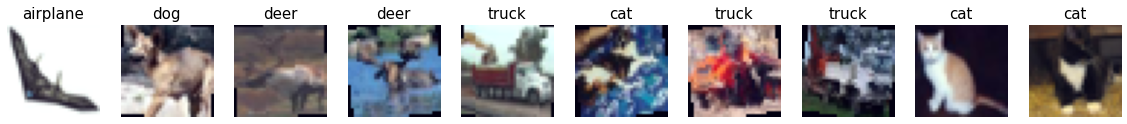

In [ ]:
# Explore sample images
utils.show_sample_images(train_loader, classes, .5, .25, num_of_images = 10)

## Import Model and show model summary

In [ ]:
# Model summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = models.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]           2,048
        MaxPool2d-10           [-1, 32, 18, 18]               0
           Conv2d-11           [-1, 64, 18, 18]          18,432
             ReLU-12           [-1, 64, 18, 18]               0
      BatchNorm2d-13           [-1, 64, 18, 18]             128
          Dropout-14           [-1

## Train and Test Model

In [ ]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train.train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    scheduler.step()
    test.test(model, device, test_loader, test_losses, test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1135518550872803 Batch_id=390 Train Accuracy=46.76: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2349, Test Accuracy: 5668/10000 (56.68%)

EPOCH: 1


Loss=0.8623361587524414 Batch_id=390 Train Accuracy=62.72: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8859, Test Accuracy: 6847/10000 (68.47%)

EPOCH: 2


Loss=0.7683025598526001 Batch_id=390 Train Accuracy=69.20: 100%|██████████| 391/391 [00:21<00:00, 18.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7838, Test Accuracy: 7297/10000 (72.97%)

EPOCH: 3


Loss=0.73496413230896 Batch_id=390 Train Accuracy=72.78: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7872, Test Accuracy: 7242/10000 (72.42%)

EPOCH: 4


Loss=0.7702053785324097 Batch_id=390 Train Accuracy=75.33: 100%|██████████| 391/391 [00:21<00:00, 18.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6851, Test Accuracy: 7628/10000 (76.28%)

EPOCH: 5


Loss=0.5829716920852661 Batch_id=390 Train Accuracy=77.17: 100%|██████████| 391/391 [00:21<00:00, 18.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6488, Test Accuracy: 7766/10000 (77.66%)

EPOCH: 6


Loss=0.47742146253585815 Batch_id=390 Train Accuracy=78.42: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6253, Test Accuracy: 7877/10000 (78.77%)

EPOCH: 7


Loss=0.6071229577064514 Batch_id=390 Train Accuracy=79.79: 100%|██████████| 391/391 [00:21<00:00, 18.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5904, Test Accuracy: 8028/10000 (80.28%)

EPOCH: 8


Loss=0.6588205099105835 Batch_id=390 Train Accuracy=80.61: 100%|██████████| 391/391 [00:21<00:00, 18.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5635, Test Accuracy: 8061/10000 (80.61%)

EPOCH: 9


Loss=0.49592989683151245 Batch_id=390 Train Accuracy=81.68: 100%|██████████| 391/391 [00:21<00:00, 18.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5867, Test Accuracy: 7980/10000 (79.80%)

EPOCH: 10


Loss=0.4436737596988678 Batch_id=390 Train Accuracy=85.05: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4643, Test Accuracy: 8413/10000 (84.13%)

EPOCH: 11


Loss=0.4614747166633606 Batch_id=390 Train Accuracy=85.66: 100%|██████████| 391/391 [00:21<00:00, 18.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4546, Test Accuracy: 8452/10000 (84.52%)

EPOCH: 12


Loss=0.4480086863040924 Batch_id=390 Train Accuracy=86.33: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4607, Test Accuracy: 8464/10000 (84.64%)

EPOCH: 13


Loss=0.22986391186714172 Batch_id=390 Train Accuracy=86.28: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4547, Test Accuracy: 8451/10000 (84.51%)

EPOCH: 14


Loss=0.20641398429870605 Batch_id=390 Train Accuracy=86.68: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4542, Test Accuracy: 8485/10000 (84.85%)

EPOCH: 15


Loss=0.3222171664237976 Batch_id=390 Train Accuracy=86.82: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4528, Test Accuracy: 8471/10000 (84.71%)

EPOCH: 16


Loss=0.4028659760951996 Batch_id=390 Train Accuracy=87.08: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4591, Test Accuracy: 8467/10000 (84.67%)

EPOCH: 17


Loss=0.3311787247657776 Batch_id=390 Train Accuracy=87.38: 100%|██████████| 391/391 [00:21<00:00, 18.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4460, Test Accuracy: 8509/10000 (85.09%)

EPOCH: 18


Loss=0.4685639441013336 Batch_id=390 Train Accuracy=87.29: 100%|██████████| 391/391 [00:21<00:00, 18.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4482, Test Accuracy: 8500/10000 (85.00%)

EPOCH: 19


Loss=0.2801329493522644 Batch_id=390 Train Accuracy=87.72: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]



Test set: Average loss: 0.4440, Test Accuracy: 8509/10000 (85.09%)



#  Validation accuracies and Loss change curves

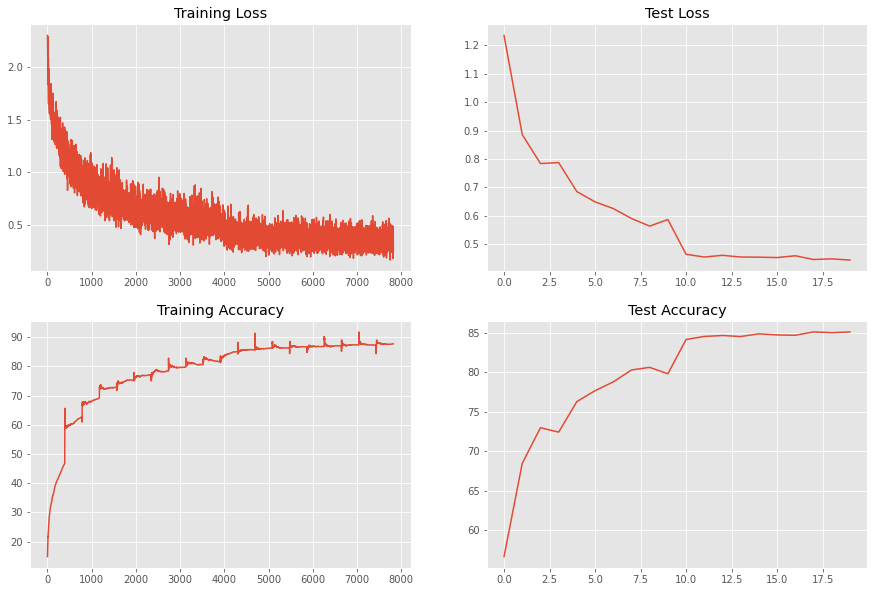

In [ ]:
utils.valid_accuracy_loss_plots(train_losses, train_acc, test_losses, test_acc)

## Display misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

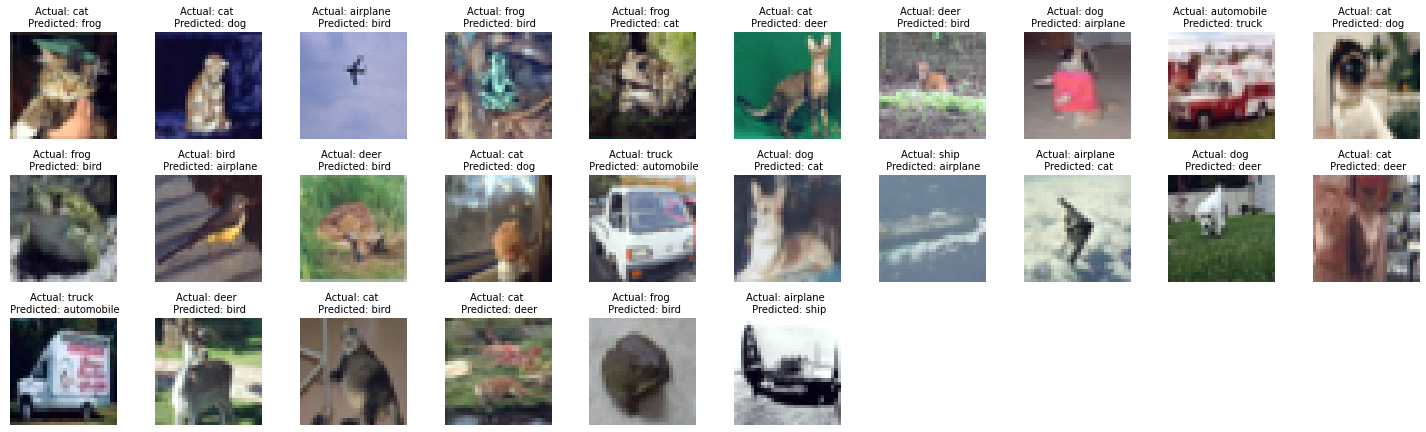

In [ ]:
utils.show_misclassified_images(model, classes, test_loader, num_of_images = 25)